In [38]:
    # Save cropped image of a player
    # for track_id, player in tracks['players'][0].items():
    #     bbox = player['bbox']
    #     frame = video_frames[0]
    # 
    #     # crop bbox from frame
    #     cropped_image = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
    # 
    #     # Save the cropped image
    #     cv2.imwrite(f"output_videos/cropped_image.jpg", cropped_image)
    #     break

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [40]:
import matplotlib.style as style

style.use('classic')

In [41]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [42]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)

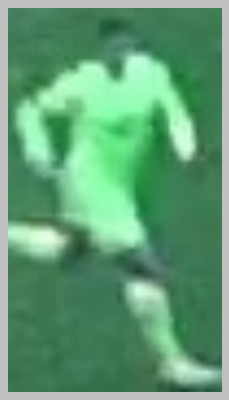

In [43]:
plt.imshow(image)
plt.axis(False)
plt.show()

## Take the top half of the image

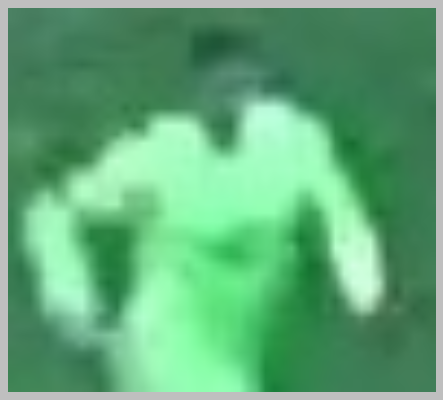

In [44]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.axis(False)
plt.show()

## Cluster image into 2 color clusters

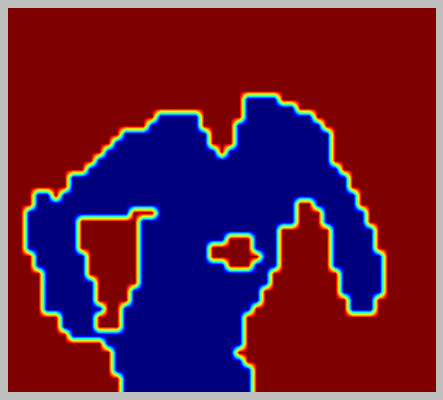

In [46]:
# Reshape image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.axis(False)
plt.show()


In [47]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

1


In [48]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [49]:
kmeans.cluster_centers_[player_cluster]

array([142.51527224, 236.03320053, 170.51527224])